<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/AI%EC%8B%A4%EC%8A%B5/day13(ml_knn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

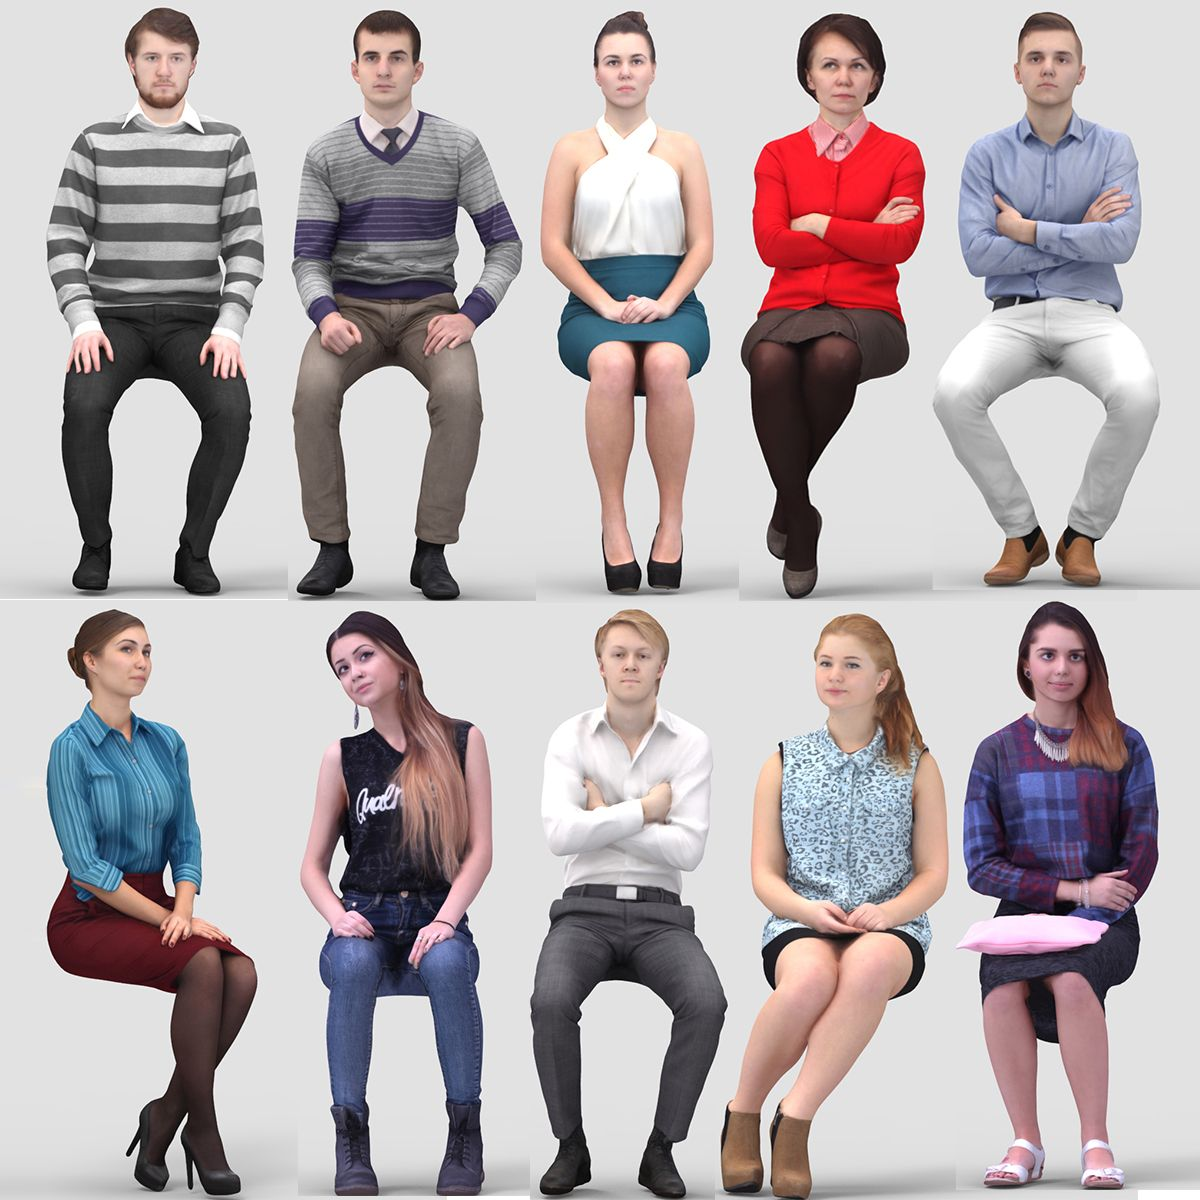

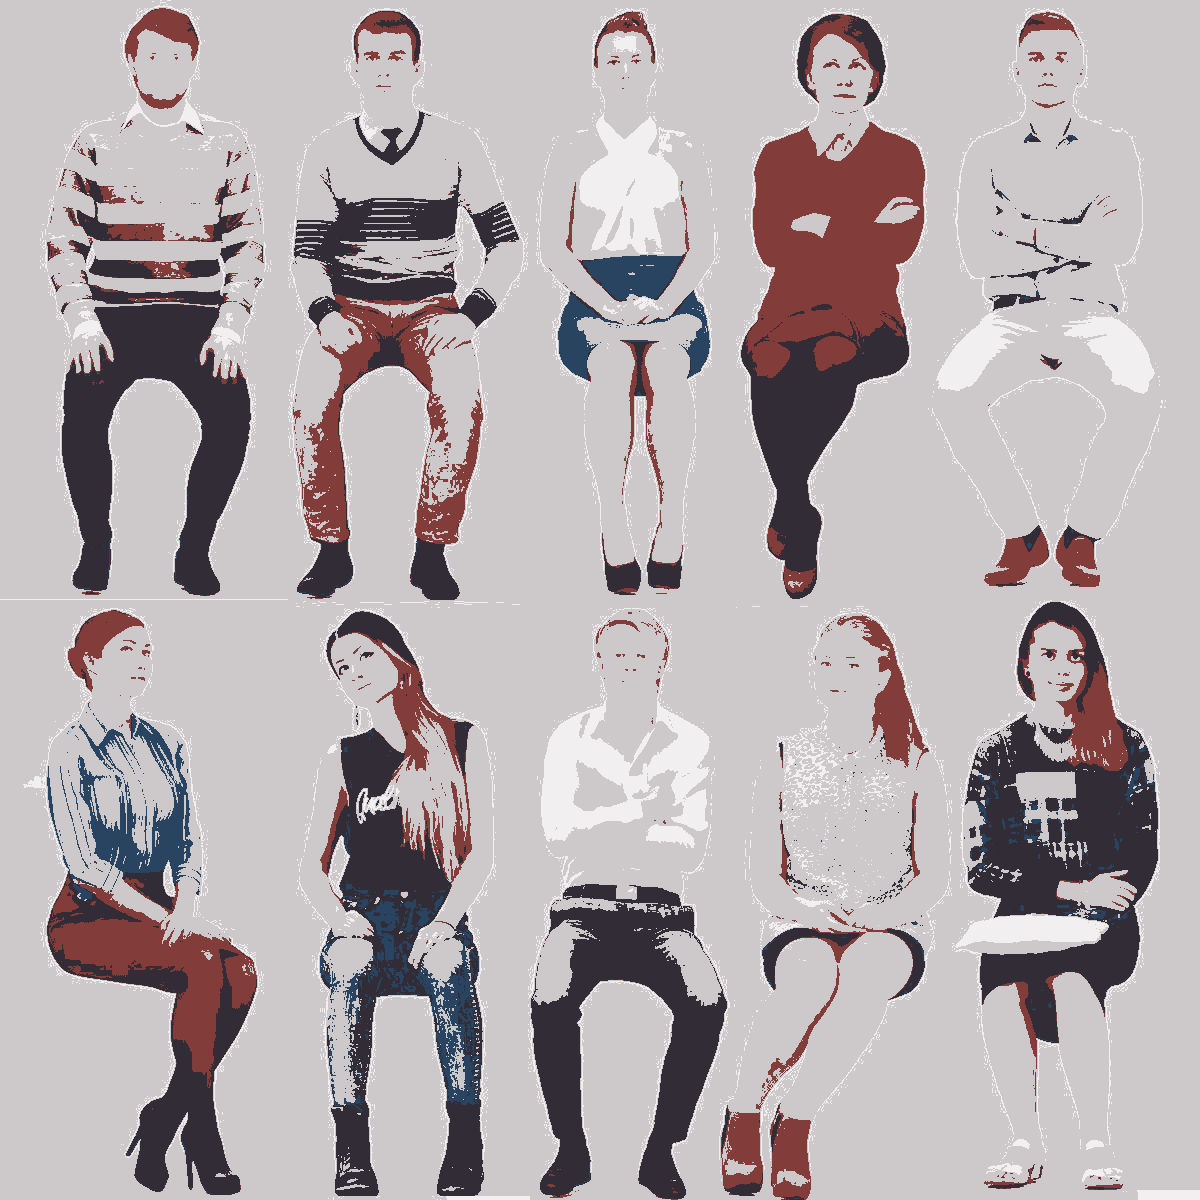

-1

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("sample_data/people.jpg")
data = img.reshape(-1, 3).astype(np.float32)
cv2_imshow(data)
# print(img.shape, data.shape)

# cr = (0,0,0.0)
cr = (cv2.TERM_CRITERIA_MAX_ITER+cv2.TERM_CRITERIA_EPS, 2,0.001)
ret, bestL, centers = cv2.kmeans(data, 7, None, cr, 2, cv2.KMEANS_RANDOM_CENTERS)

centers = centers.astype(np.uint8)
dst = centers[bestL].reshape(img.shape)

cv2_imshow(img)
cv2_imshow(dst)
cv2.waitKey(0)



In [14]:
# https://github.com/zalandoresearch/fashion-mnist
import cv2
import numpy as np


file_name_t1 = 'sample_data/fashion-mnist/train-images-idx3-ubyte'
file_name_t2 = 'sample_data/fashion-mnist/train-labels-idx1-ubyte'
file_name_s1 = 'sample_data/fashion-mnist/t10k-images-idx3-ubyte'
file_name_s2 = 'sample_data/fashion-mnist/t10k-labels-idx1-ubyte'

def loadData(img_path, label_path):
    images=''
    labels=''
    with open(img_path, 'rb') as image_data:
        images = np.frombuffer(image_data.read(), dtype=np.uint8, offset=16).reshape(-1, 784)

    with open(label_path, 'rb') as label_data:
        labels = np.frombuffer(label_data.read(), dtype=np.uint8, offset=8)

    return images, labels


train_x, train_y = loadData(file_name_t1, file_name_t2)
test_x, test_y = loadData(file_name_s1, file_name_s2)




# print(len(train_x), len(train_y))
# print(len(test_x), len(test_y))
#
#
#
# cv2.imshow("tmp", train_x[50000].reshape(28,28,1))
# print(train_y[50000])
# cv2.waitKey(0)

In [8]:
# https://github.com/zalandoresearch/fashion-mnist
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


file_name_t1 = 'sample_data/fashion-mnist/train-images-idx3-ubyte'
file_name_t2 = 'sample_data/fashion-mnist/train-labels-idx1-ubyte'
file_name_s1 = 'sample_data/fashion-mnist/t10k-images-idx3-ubyte'
file_name_s2 = 'sample_data/fashion-mnist/t10k-labels-idx1-ubyte'

def loadData(img_path, label_path):
    images=''
    labels=''
    with open(img_path, 'rb') as image_data:
        images = np.frombuffer(image_data.read(), dtype=np.uint8, offset=16).reshape(-1, 784)

    with open(label_path, 'rb') as label_data:
        labels = np.frombuffer(label_data.read(), dtype=np.uint8, offset=8)

    return images, labels


train_x, train_y = loadData(file_name_t1, file_name_t2)
test_x, test_y = loadData(file_name_s1, file_name_s2)

knn = cv2.ml.KNearest_create()
knn.train(train_x.astype(np.float32), cv2.ml.ROW_SAMPLE, train_y.astype(np.int32))
res, result, response, dist = knn.findNearest(test_x[500:1000].astype(np.float32), 7)

match = result.astype(np.uint8) == test_y[500:1000][:, None]
mathres = np.count_nonzero(match)/500*100
print(mathres)
print(res, result, response, dist)

print(test_y, len(test_y), set(test_y))

cv2_imshow(train_x[3000].reshape(28,28,1))
print(train_y[3000])
cv2.waitKey(0)

84.8
2.0 [[2.]
 [0.]
 [5.]
 [7.]
 [1.]
 [8.]
 [2.]
 [2.]
 [2.]
 [2.]
 [4.]
 [4.]
 [6.]
 [1.]
 [9.]
 [8.]
 [5.]
 [1.]
 [9.]
 [1.]
 [2.]
 [8.]
 [3.]
 [8.]
 [9.]
 [2.]
 [2.]
 [2.]
 [8.]
 [8.]
 [2.]
 [6.]
 [5.]
 [8.]
 [8.]
 [5.]
 [3.]
 [9.]
 [4.]
 [3.]
 [4.]
 [4.]
 [7.]
 [1.]
 [0.]
 [1.]
 [2.]
 [0.]
 [2.]
 [9.]
 [6.]
 [1.]
 [5.]
 [1.]
 [1.]
 [1.]
 [9.]
 [3.]
 [4.]
 [5.]
 [3.]
 [0.]
 [2.]
 [0.]
 [4.]
 [0.]
 [0.]
 [5.]
 [8.]
 [2.]
 [3.]
 [4.]
 [0.]
 [7.]
 [7.]
 [8.]
 [9.]
 [6.]
 [6.]
 [8.]
 [7.]
 [0.]
 [7.]
 [9.]
 [3.]
 [2.]
 [6.]
 [6.]
 [5.]
 [0.]
 [1.]
 [1.]
 [5.]
 [9.]
 [4.]
 [2.]
 [5.]
 [7.]
 [8.]
 [1.]
 [2.]
 [9.]
 [7.]
 [7.]
 [1.]
 [0.]
 [9.]
 [6.]
 [2.]
 [9.]
 [0.]
 [7.]
 [6.]
 [8.]
 [2.]
 [7.]
 [0.]
 [2.]
 [3.]
 [8.]
 [2.]
 [2.]
 [6.]
 [9.]
 [3.]
 [0.]
 [7.]
 [8.]
 [6.]
 [2.]
 [9.]
 [4.]
 [2.]
 [6.]
 [6.]
 [0.]
 [0.]
 [4.]
 [4.]
 [2.]
 [7.]
 [7.]
 [8.]
 [4.]
 [9.]
 [1.]
 [0.]
 [5.]
 [4.]
 [4.]
 [4.]
 [0.]
 [0.]
 [4.]
 [5.]
 [6.]
 [0.]
 [4.]
 [5.]
 [4.]
 [1.]
 [3.]
 [1.]
 [0.]
 [6.]
 

6


-1

In [11]:
# https://github.com/zalandoresearch/fashion-mnist
import cv2
import numpy as np


file_name_t1 = 'sample_data/fashion-mnist/train-images-idx3-ubyte'
file_name_t2 = 'sample_data/fashion-mnist/train-labels-idx1-ubyte'
file_name_s1 = 'sample_data/fashion-mnist/t10k-images-idx3-ubyte'
file_name_s2 = 'sample_data/fashion-mnist/t10k-labels-idx1-ubyte'

def loadData(img_path, label_path):
    images=''
    labels=''
    with open(img_path, 'rb') as image_data:
        images = np.frombuffer(image_data.read(), dtype=np.uint8, offset=16).reshape(-1, 784)

    with open(label_path, 'rb') as label_data:
        labels = np.frombuffer(label_data.read(), dtype=np.uint8, offset=8)

    return images, labels


train_x, train_y = loadData(file_name_t1, file_name_t2)
test_x, test_y = loadData(file_name_s1, file_name_s2)

knn = cv2.ml.KNearest_create()
knn.train(train_x.astype(np.float32), cv2.ml.ROW_SAMPLE, train_y.astype(np.int32))
res, result, response, dist = knn.findNearest(test_x[500:1000].astype(np.float32), 7)

match = result.astype(np.uint8) == test_y[500:1000][:, None]
mathres = np.count_nonzero(match)/500*100
print('확률' , mathres)

name_dict = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

while True:
    num = input("번호를 고르세요 :")
    fc = int(num)

    if fc < 0 or fc >= 10000:
        break

    cv2_imshow(test_x[fc].reshape(28,28,1))
    print('종류 : ' , name_dict[test_y[fc]])
    cv2.waitKey(0)
    #cv2.destroyWindow("tmp")

확률 84.8
번호를 고르세요 :3000


종류 :  Trouser
번호를 고르세요 :2000


종류 :  Bag
번호를 고르세요 :500


종류 :  Pullover
번호를 고르세요 :-1
